
Problem Description : To predict the Customer life time value for an auto insurance company based on different quantitative and qualitative features provided.


 A major non-life insurance company wants to evaluate customer life time value based on each customer’s demographics and policy information including claim details. The CLV is a profitability metric in terms of a value placed by the company on each customer and can be conceived in two dimensions: the customer`s present Value and potential future Value.

In [ ]:
import numpy as np     #importing necessary libraries
import pandas as pd

In [ ]:
na_vals=["N/a","na",np.nan,"?","NA"]


In [ ]:
data=pd.read_csv('/content/customer_life_time_value.csv',na_values=na_vals)  # Reading the data by importing csv file

In [ ]:
data.head(10)   #Reading the first 10 rows of the dataset

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0.0,"17.7,77.7",Urban,Married,...,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,2057,8005.964669,Basic,College,Employed,M,63357.0,"28.8,76.6",Suburban,Married,...,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125.0,"21.6,88.4",Urban,Married,...,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,1801,9294.088719,Basic,College,Employed,M,67544.0,"19,72.5",Suburban,Married,...,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651.0,"19.1,74.7",Suburban,Married,...,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0
5,2747,16570.090090,Extended,Bachelor,Employed,M,23589.0,"19,71.4",Suburban,Married,...,13,NaN,6.0,Special Auto,Special L2,Offer2,Agent,1012.800000,Luxury SUV,3.0
6,3633,3653.703458,Extended,College,Employed,F,74126.0,"28.6,76.3",Suburban,Married,...,76,0.0,1.0,Corporate Auto,Corporate L3,Offer2,Call Center,478.751065,Two-Door Car,2.0
7,3856,11154.675990,Extended,Doctor,Employed,F,31409.0,"17.3,79.1",Urban,Married,...,50,0.0,2.0,Personal Auto,Personal L3,Offer1,Branch,381.960657,Four-Door Car,2.0
8,9005,4428.031583,Basic,High School or Below,Employed,F,58577.0,"17.6,78.5",Urban,Married,...,62,0.0,1.0,Personal Auto,Personal L3,Offer1,Agent,303.872752,SUV,2.0
9,5725,8382.630118,Basic,High School or Below,Retired,M,19683.0,"13.2,80.3",Suburban,Married,...,41,1.0,9.0,Corporate Auto,Corporate L1,Offer1,Web,561.600000,Sports Car,2.0


In [ ]:
data.info()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9806 entries, 0 to 9805
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     9806 non-null   int64  
 1   Customer.Lifetime.Value        9806 non-null   float64
 2   Coverage                       8881 non-null   object 
 3   Education                      9677 non-null   object 
 4   EmploymentStatus               9688 non-null   object 
 5   Gender                         9677 non-null   object 
 6   Income                         9688 non-null   float64
 7   Location.Geo                   9806 non-null   object 
 8   Location.Code                  9687 non-null   object 
 9   Marital.Status                 9677 non-null   object 
 10  Monthly.Premium.Auto           9012 non-null   float64
 11  Months.Since.Last.Claim        9806 non-null   int64  
 12  Months.Since.Policy.Inception  9806 non-null   i

So, there are both numerical columns and categorical columns

In [ ]:
data.isna().sum()   #Finding is there any null values are present in the dataset

CustomerID                         0
Customer.Lifetime.Value            0
Coverage                         925
Education                        129
EmploymentStatus                 118
Gender                           129
Income                           118
Location.Geo                       0
Location.Code                    119
Marital.Status                   129
Monthly.Premium.Auto             794
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints        818
Number.of.Policies               121
Policy.Type                      891
Policy                           121
Renew.Offer.Type                 128
Sales.Channel                    128
Total.Claim.Amount                 0
Vehicle.Class                    126
Vehicle.Size                     126
dtype: int64

So, Null values are present in the Dataset, for filling the null vlaues in the categorical variables used Mode imputation method and for Numerical variables used Median imputation.

In [ ]:
numericalcolumns_n=[]                  #seperating the numerical and categorical columns 
categoricalcolumns_c=[]
for i in data.columns:
  if data[i].dtypes==object:
    categoricalcolumns_c.append(i)
  else:
    numericalcolumns_n.append(i) 

In [ ]:
numericalcolumns_n

['CustomerID',
 'Customer.Lifetime.Value',
 'Income',
 'Monthly.Premium.Auto',
 'Months.Since.Last.Claim',
 'Months.Since.Policy.Inception',
 'Number.of.Open.Complaints',
 'Number.of.Policies',
 'Total.Claim.Amount',
 'Vehicle.Size']

In [ ]:
data[numericalcolumns_n].isna().sum()    # Finding null values only for numerical columns

CustomerID                         0
Customer.Lifetime.Value            0
Income                           118
Monthly.Premium.Auto             794
Months.Since.Last.Claim            0
Months.Since.Policy.Inception      0
Number.of.Open.Complaints        818
Number.of.Policies               121
Total.Claim.Amount                 0
Vehicle.Size                     126
dtype: int64

In [ ]:
data[categoricalcolumns_c].isna().sum()   # Finding null values only for categorical columns

Coverage            925
Education           129
EmploymentStatus    118
Gender              129
Location.Geo          0
Location.Code       119
Marital.Status      129
Policy.Type         891
Policy              121
Renew.Offer.Type    128
Sales.Channel       128
Vehicle.Class       126
dtype: int64

In [ ]:
for col in categoricalcolumns_c:                                  #reading value counts for categorical columns
    print("Value counts for column {}:".format(col))
    print(data[col].value_counts())
    print("\n")

Value counts for column Coverage:
Basic       5361
Extended    2697
Premium      823
Name: Coverage, dtype: int64


Value counts for column Education:
Bachelor                2934
College                 2836
High School or Below    2796
Master                   759
Doctor                   352
Name: Education, dtype: int64


Value counts for column EmploymentStatus:
Employed         6020
Unemployed       2461
Medical Leave     491
Disabled          429
Retired           287
Name: EmploymentStatus, dtype: int64


Value counts for column Gender:
F    4985
M    4692
Name: Gender, dtype: int64


Value counts for column Location.Geo:
NA,NA        119
19.2,72.4     26
18.9,72.6     26
18.9,72.7     22
17.2,78.5     21
            ... 
13.4,78.8      1
20,73.3        1
29.8,78.7      1
21.9,88.7      1
28.3,77.6      1
Name: Location.Geo, Length: 2840, dtype: int64


Value counts for column Location.Code:
Suburban    6204
Rural       1810
Urban       1673
Name: Location.Code, dtype: int64




#Filling null values in Numerical variables with Median

In [ ]:
median_A = data['Monthly.Premium.Auto'].median()
median_B = data['Number.of.Open.Complaints'].median()
median_C = data['Number.of.Policies'].median()
median_D = data['Vehicle.Size'].median()
median_E = data['Income'].median()
data['Monthly.Premium.Auto'] = data['Monthly.Premium.Auto'].fillna(median_A)
data['Number.of.Open.Complaints'] = data['Number.of.Open.Complaints'].fillna(median_B)
data['Number.of.Policies'] = data['Number.of.Policies'].fillna(median_C)
data['Vehicle.Size'] = data['Vehicle.Size'].fillna(median_D)
data['Income']=data['Income'].fillna(median_E)


In [ ]:
data[numericalcolumns_n].isna().sum()


CustomerID                       0
Customer.Lifetime.Value          0
Income                           0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Total.Claim.Amount               0
Vehicle.Size                     0
dtype: int64

In [ ]:
data[numericalcolumns_n]

,CustomerID,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size
0,5917,7824.372789,0.0,67.0,2,33,0.0,2.0,267.214383,2.0
1,2057,8005.964669,63357.0,101.0,26,42,0.0,5.0,565.508572,2.0
2,4119,8646.504109,64125.0,108.0,3,44,0.0,3.0,369.818708,1.0
3,1801,9294.088719,67544.0,116.0,2,15,0.0,3.0,556.800000,3.0
4,9618,5595.971365,19651.0,72.0,3,68,0.0,5.0,345.600000,3.0
...,...,...,...,...,...,...,...,...,...,...
9801,3735,20496.694260,0.0,64.0,10,72,0.0,2.0,307.200000,2.0
9802,5988,2592.437797,72421.0,65.0,8,23,0.0,1.0,312.000000,3.0
9803,8767,3103.923041,74665.0,78.0,10,90,2.0,1.0,236.902001,2.0
9804,9900,9161.655119,91763.0,113.0,22,64,0.0,3.0,441.992043,3.0


In [ ]:
data[numericalcolumns_n].dtypes

CustomerID                         int64
Customer.Lifetime.Value          float64
Income                           float64
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints        float64
Number.of.Policies               float64
Total.Claim.Amount               float64
Vehicle.Size                     float64
dtype: object

#Filling Null values in Categorical variables with Mode

In [ ]:
categoricalcolumns_c

['Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location.Geo',
 'Location.Code',
 'Marital.Status',
 'Policy.Type',
 'Policy',
 'Renew.Offer.Type',
 'Sales.Channel',
 'Vehicle.Class']

In [ ]:
# Loop over each categorical column
for col in data.select_dtypes(include='object'):
    # Calculate the mode of the column
    mode_val = data[col].mode()[0]
    # Fill null values with the mode of the column
    data[col].fillna(mode_val, inplace=True)

In [ ]:
data[categoricalcolumns_c].isna().sum()

Coverage            0
Education           0
EmploymentStatus    0
Gender              0
Location.Geo        0
Location.Code       0
Marital.Status      0
Policy.Type         0
Policy              0
Renew.Offer.Type    0
Sales.Channel       0
Vehicle.Class       0
dtype: int64

In [ ]:
data.isna().sum()

CustomerID                       0
Customer.Lifetime.Value          0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location.Geo                     0
Location.Code                    0
Marital.Status                   0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Policy.Type                      0
Policy                           0
Renew.Offer.Type                 0
Sales.Channel                    0
Total.Claim.Amount               0
Vehicle.Class                    0
Vehicle.Size                     0
dtype: int64

In [ ]:
for col in categoricalcolumns_c:
    print("Value counts for column {}:".format(col))
    print(data[col].value_counts())
    print("\n")

Value counts for column Coverage:
Basic       6286
Extended    2697
Premium      823
Name: Coverage, dtype: int64


Value counts for column Education:
Bachelor                3063
College                 2836
High School or Below    2796
Master                   759
Doctor                   352
Name: Education, dtype: int64


Value counts for column EmploymentStatus:
Employed         6138
Unemployed       2461
Medical Leave     491
Disabled          429
Retired           287
Name: EmploymentStatus, dtype: int64


Value counts for column Gender:
F    5114
M    4692
Name: Gender, dtype: int64


Value counts for column Location.Geo:
NA,NA        119
19.2,72.4     26
18.9,72.6     26
18.9,72.7     22
17.2,78.5     21
            ... 
13.4,78.8      1
20,73.3        1
29.8,78.7      1
21.9,88.7      1
28.3,77.6      1
Name: Location.Geo, Length: 2840, dtype: int64


Value counts for column Location.Code:
Suburban    6323
Rural       1810
Urban       1673
Name: Location.Code, dtype: int64




In [ ]:
data[categoricalcolumns_c].columns

Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Geo',
       'Location.Code', 'Marital.Status', 'Policy.Type', 'Policy',
       'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class'],
      dtype='object')

In [ ]:
# converting categorical columns as type category
categoricalcolumns_c=data[categoricalcolumns_c].astype('category')

In [ ]:
data_a= np.array(categoricalcolumns_c)

In [ ]:
# Encode each categorical column with numerical labels
encoded_data = []
for col in range(data_a.shape[1]):
    # Get unique categories in the column
    categories = np.unique(data_a[:, col])
    # Create a dictionary to map categories to numerical labels
    label_map = {}
    for i in range(len(categories)):
        label_map[categories[i]] = i
    # Encode the column with numerical labels
    encoded_col = np.array([label_map[d] for d in data_a[:, col]])
    # Add the encoded column to the list
    encoded_data.append(encoded_col)

# Convert the list of encoded columns to a 2D array
encoded_data = np.stack(encoded_data, axis=1)

# Print the encoded data
print(encoded_data)


[[0 0 4 ... 1 1 0]
 [0 1 1 ... 1 0 3]
 [0 3 1 ... 1 1 3]
 ...
 [1 1 1 ... 1 2 0]
 [0 3 1 ... 0 2 3]
 [2 3 0 ... 1 2 0]]


converting an array to dataframe

In [ ]:
dataframe_d = pd.DataFrame(data=encoded_data, columns=['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Geo','Location.Code', 'Marital.Status', 'Policy.Type', 'Policy',
'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class'])

In [ ]:
dataframe_d

,Coverage,Education,EmploymentStatus,Gender,Location.Geo,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class
0,0,0,4,0,923,2,1,1,4,1,1,0
1,0,1,1,1,2560,1,1,1,4,1,0,3
2,0,3,1,0,1808,2,1,1,3,1,1,3
3,0,1,1,1,1432,1,1,0,2,0,1,3
4,0,0,3,0,1501,1,1,1,3,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9801,0,3,4,0,115,1,2,1,4,0,1,0
9802,0,3,1,1,1262,1,1,0,2,1,2,0
9803,1,1,1,0,1546,2,1,0,1,1,2,0
9804,0,3,1,0,1662,2,1,2,8,0,2,3


In [ ]:
dataframe_d.dtypes

Coverage            int64
Education           int64
EmploymentStatus    int64
Gender              int64
Location.Geo        int64
Location.Code       int64
Marital.Status      int64
Policy.Type         int64
Policy              int64
Renew.Offer.Type    int64
Sales.Channel       int64
Vehicle.Class       int64
dtype: object

In [ ]:
numericalcolumns_n

['CustomerID',
 'Customer.Lifetime.Value',
 'Income',
 'Monthly.Premium.Auto',
 'Months.Since.Last.Claim',
 'Months.Since.Policy.Inception',
 'Number.of.Open.Complaints',
 'Number.of.Policies',
 'Total.Claim.Amount',
 'Vehicle.Size']

In [ ]:
dataframe_d

,Coverage,Education,EmploymentStatus,Gender,Location.Geo,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class
0,0,0,4,0,923,2,1,1,4,1,1,0
1,0,1,1,1,2560,1,1,1,4,1,0,3
2,0,3,1,0,1808,2,1,1,3,1,1,3
3,0,1,1,1,1432,1,1,0,2,0,1,3
4,0,0,3,0,1501,1,1,1,3,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9801,0,3,4,0,115,1,2,1,4,0,1,0
9802,0,3,1,1,1262,1,1,0,2,1,2,0
9803,1,1,1,0,1546,2,1,0,1,1,2,0
9804,0,3,1,0,1662,2,1,2,8,0,2,3


In [ ]:
data[numericalcolumns_n]

,CustomerID,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size
0,5917,7824.372789,0.0,67.0,2,33,0.0,2.0,267.214383,2.0
1,2057,8005.964669,63357.0,101.0,26,42,0.0,5.0,565.508572,2.0
2,4119,8646.504109,64125.0,108.0,3,44,0.0,3.0,369.818708,1.0
3,1801,9294.088719,67544.0,116.0,2,15,0.0,3.0,556.800000,3.0
4,9618,5595.971365,19651.0,72.0,3,68,0.0,5.0,345.600000,3.0
...,...,...,...,...,...,...,...,...,...,...
9801,3735,20496.694260,0.0,64.0,10,72,0.0,2.0,307.200000,2.0
9802,5988,2592.437797,72421.0,65.0,8,23,0.0,1.0,312.000000,3.0
9803,8767,3103.923041,74665.0,78.0,10,90,2.0,1.0,236.902001,2.0
9804,9900,9161.655119,91763.0,113.0,22,64,0.0,3.0,441.992043,3.0


In [ ]:
#Concatinating the both Numerical and Categorical Features
dataconcat = pd.concat([data[numericalcolumns_n],dataframe_d],axis=1)

In [ ]:
dataconcat

,CustomerID,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size,...,EmploymentStatus,Gender,Location.Geo,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class
0,5917,7824.372789,0.0,67.0,2,33,0.0,2.0,267.214383,2.0,...,4,0,923,2,1,1,4,1,1,0
1,2057,8005.964669,63357.0,101.0,26,42,0.0,5.0,565.508572,2.0,...,1,1,2560,1,1,1,4,1,0,3
2,4119,8646.504109,64125.0,108.0,3,44,0.0,3.0,369.818708,1.0,...,1,0,1808,2,1,1,3,1,1,3
3,1801,9294.088719,67544.0,116.0,2,15,0.0,3.0,556.800000,3.0,...,1,1,1432,1,1,0,2,0,1,3
4,9618,5595.971365,19651.0,72.0,3,68,0.0,5.0,345.600000,3.0,...,3,0,1501,1,1,1,3,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,3735,20496.694260,0.0,64.0,10,72,0.0,2.0,307.200000,2.0,...,4,0,115,1,2,1,4,0,1,0
9802,5988,2592.437797,72421.0,65.0,8,23,0.0,1.0,312.000000,3.0,...,1,1,1262,1,1,0,2,1,2,0
9803,8767,3103.923041,74665.0,78.0,10,90,2.0,1.0,236.902001,2.0,...,1,0,1546,2,1,0,1,1,2,0
9804,9900,9161.655119,91763.0,113.0,22,64,0.0,3.0,441.992043,3.0,...,1,0,1662,2,1,2,8,0,2,3


In [ ]:
dataconcat.describe()             

,CustomerID,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size,...,EmploymentStatus,Gender,Location.Geo,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class
count,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,...,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000,9806.000000
mean,5778.381807,7998.047015,37466.006731,92.503365,15.143993,48.165001,0.347542,2.948501,438.266734,2.088619,...,1.817765,0.478483,1420.474301,0.986029,1.119111,0.842443,3.813482,0.958699,1.085866,1.881093
std,3343.286093,6848.055899,30112.906473,33.115161,10.004327,27.963630,0.864601,2.377375,293.502301,0.535148,...,1.342034,0.499562,747.829372,0.595845,0.630265,0.457425,1.613237,1.006976,1.066083,2.075017
min,1.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2879.250000,4013.949039,0.000000,69.000000,6.000000,24.000000,0.000000,1.000000,280.352767,2.000000,...,1.000000,0.000000,796.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000
50%,5783.000000,5780.182197,33767.500000,83.000000,14.000000,48.000000,0.000000,2.000000,384.007015,2.000000,...,1.000000,0.000000,1390.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000
75%,8678.750000,8960.280213,61647.000000,107.000000,23.000000,71.750000,0.000000,4.000000,553.540973,2.000000,...,4.000000,1.000000,2017.750000,1.000000,2.000000,1.000000,5.000000,2.000000,2.000000,4.000000
max,11573.000000,83325.381190,99981.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,3.000000,...,4.000000,1.000000,2839.000000,2.000000,2.000000,2.000000,8.000000,3.000000,3.000000,5.000000


# VISUALIZATION

In [ ]:
corr= dataconcat.corr()         

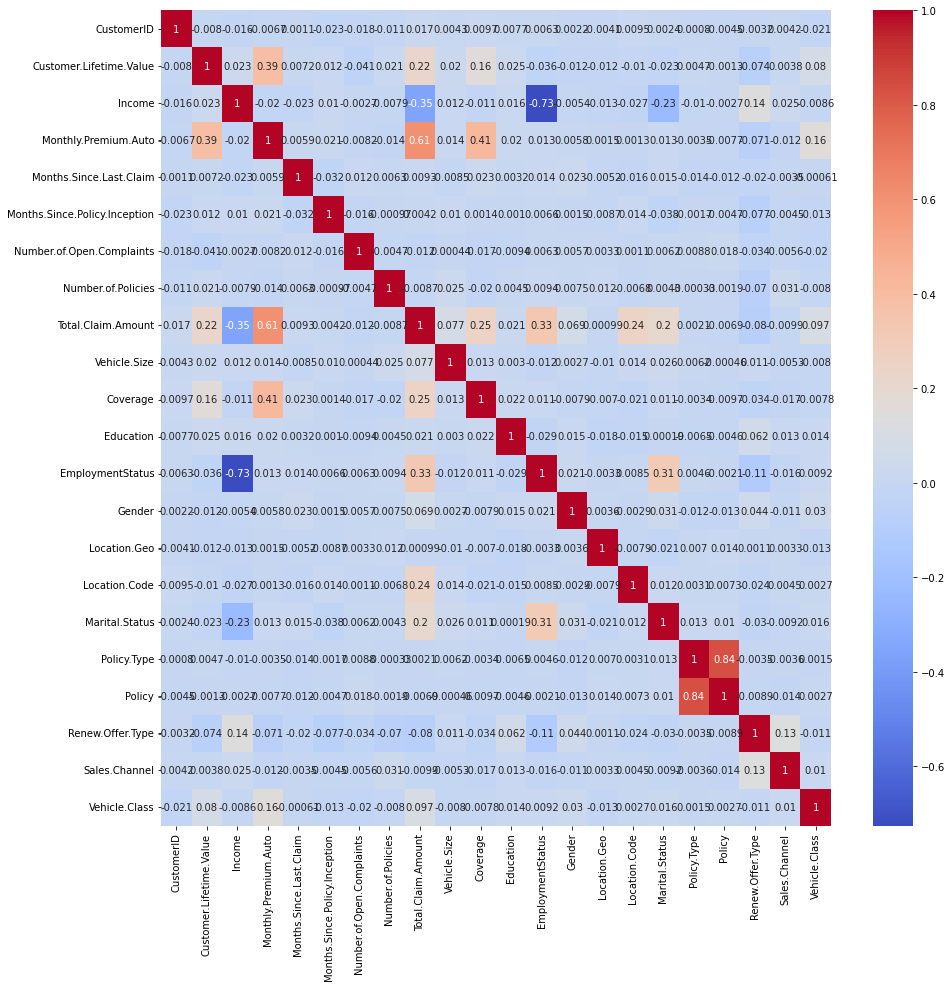

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()


#Observations from heatmap
1. There is no strong correlation between Target feature(Customer.Life.Time.Value) with other Independent Features
2. Found a Strong Correlation Between Policy and Policy Type

# Outliers Detection

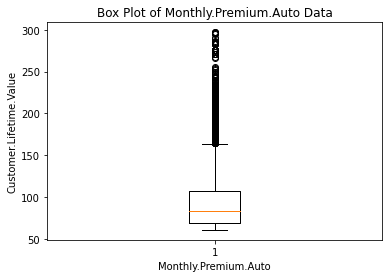

In [ ]:
# Select the column of data
column_data = dataconcat['Monthly.Premium.Auto']

# Create a box plot
plt.boxplot(column_data)

# Add labels and title
plt.xlabel('Monthly.Premium.Auto')
plt.ylabel('Customer.Lifetime.Value')
plt.title('Box Plot of Monthly.Premium.Auto Data')

# Show the plot
plt.show()

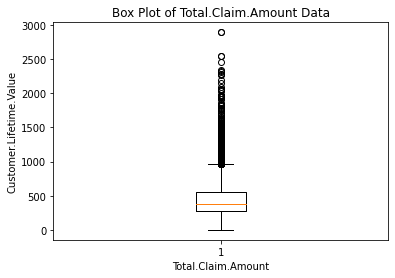

In [ ]:
# Select the column of data
column_data = dataconcat['Total.Claim.Amount']

# Create a box plot
plt.boxplot(column_data)

# Add labels and title
plt.xlabel('Total.Claim.Amount')
plt.ylabel('Customer.Lifetime.Value')
plt.title('Box Plot of Total.Claim.Amount Data')

# Show the plot
plt.show()

#Finding Percent of Outliers

In [ ]:
df = dataconcat[['Monthly.Premium.Auto','Total.Claim.Amount']]

In [ ]:
# Initialize empty dictionaries to store percentage of outliers for each feature
percent_outliers_feat1 = {}
percent_outliers_feat2 = {}
# Loop through each feature
for feat in df.columns:
    # Calculate the IQR of the feature
    q1, q3 = np.percentile(df[feat], [25, 75])
    iqr = q3 - q1
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Calculate the number of outliers and total number of values for the feature
    num_outliers = len(df[(df[feat] < lower_bound) | (df[feat] > upper_bound)])
    total_vals = len(df)
    # Calculate the percentage of outliers and store in the corresponding dictionary
    percent_outliers = num_outliers / total_vals * 100
    if feat == 'Monthly.Premium.Auto':
        percent_outliers_feat1[feat] = percent_outliers
    else:
        percent_outliers_feat2[feat] = percent_outliers

# Print the percentage of outliers for each feature
print("Percentage of outliers for Feature 1:", percent_outliers_feat1)
print("Percentage of outliers for Feature 2:", percent_outliers_feat2)

Percentage of outliers for Feature 1: {'Monthly.Premium.Auto': 4.61962064042423}
Percentage of outliers for Feature 2: {'Total.Claim.Amount': 5.0479298388741585}


#Replacing outliers with Median

In [ ]:
import pandas as pd
import numpy as np

# Generate sample data
df = dataconcat[['Total.Claim.Amount','Monthly.Premium.Auto']]

# Loop through each feature
for feat in df.columns:
    # Calculate mean and standard deviation of the feature
    mean = df[feat].mean()
    std = df[feat].std()
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = mean - 1.5 * std
    upper_bound = mean + 1.5 * std
    
    # Replace outlier values with the median value of the feature
    median = df[feat].median()
    df.loc[df[feat] < lower_bound, feat] = median
    df.loc[df[feat] > upper_bound, feat] = median

# Print the updated dataframe
print(df)


      Total.Claim.Amount  Monthly.Premium.Auto
0             267.214383                  67.0
1             565.508572                 101.0
2             369.818708                 108.0
3             556.800000                 116.0
4             345.600000                  72.0
...                  ...                   ...
9801          307.200000                  64.0
9802          312.000000                  65.0
9803          236.902001                  78.0
9804          441.992043                 113.0
9805          547.200000                 114.0

[9806 rows x 2 columns]


<ipython-input-40-5b94af67c1ab>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[feat] < lower_bound, feat] = median
<ipython-input-40-5b94af67c1ab>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[feat] > upper_bound, feat] = median
<ipython-input-40-5b94af67c1ab>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[feat] < lower_bound, feat] = median
<ipython-input-40-5b94af67c1ab>:20: SettingWithCopyWarn

In [ ]:
dataconcat['Monthly.Premium.Auto'] = df['Monthly.Premium.Auto']

In [ ]:
dataconcat['Total.Claim.Amount'] = df['Total.Claim.Amount']

# Finding the Distribution by Distplot as follows for (Monthly.Premium.Auto) and (Total.Claim.Amount)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total.Claim.Amount', ylabel='Density'>

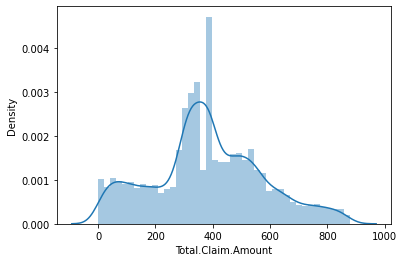

In [ ]:
sns.distplot(dataconcat['Total.Claim.Amount'])

In [ ]:
dataconcat['Total.Claim.Amount'].skew()

0.16557725194012776

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly.Premium.Auto', ylabel='Density'>

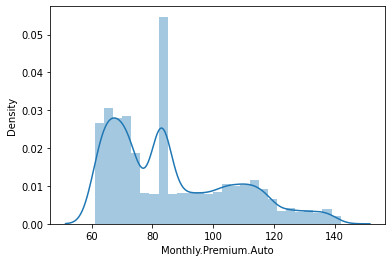

In [ ]:
sns.distplot(dataconcat['Monthly.Premium.Auto'])

In [ ]:
dataconcat['Monthly.Premium.Auto'].skew()

0.7464801152173584

Observtions From Distplot

1. Both Monthly.Premium.auto and Total.Claim.Amount are Right Skewed

# Feature Engineering

In [ ]:
numericalcolumns_n

['CustomerID',
 'Customer.Lifetime.Value',
 'Income',
 'Monthly.Premium.Auto',
 'Months.Since.Last.Claim',
 'Months.Since.Policy.Inception',
 'Number.of.Open.Complaints',
 'Number.of.Policies',
 'Total.Claim.Amount',
 'Vehicle.Size']

In [ ]:
dataconcat[numericalcolumns_n].isna().sum()

CustomerID                       0
Customer.Lifetime.Value          0
Income                           0
Monthly.Premium.Auto             0
Months.Since.Last.Claim          0
Months.Since.Policy.Inception    0
Number.of.Open.Complaints        0
Number.of.Policies               0
Total.Claim.Amount               0
Vehicle.Size                     0
dtype: int64

In [ ]:
columns_to_transform=dataconcat[['Monthly.Premium.Auto']]
for column in columns_to_transform:
  for i in range(len(dataconcat[column])):
    if dataconcat[column][i] > 0 :
      dataconcat[column][i] = np.log(dataconcat[column][i])
    else:
      dataconcat[column][i] = 0

<ipython-input-49-6dcfdfb823fb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataconcat[column][i] = np.log(dataconcat[column][i])


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly.Premium.Auto', ylabel='Density'>

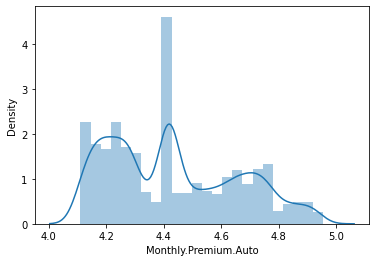

In [ ]:
sns.distplot(dataconcat['Monthly.Premium.Auto'])

In [ ]:
dataconcat['Monthly.Premium.Auto'].skew()

0.4334084247840978

In [ ]:
dataconcat.columns

Index(['CustomerID', 'Customer.Lifetime.Value', 'Income',
       'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Total.Claim.Amount', 'Vehicle.Size', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender', 'Location.Geo',
       'Location.Code', 'Marital.Status', 'Policy.Type', 'Policy',
       'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np

# Generate sample data with 20 features
df1 = dataconcat[['Customer.Lifetime.Value', 'Income', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Total.Claim.Amount', 'Vehicle.Size', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender', 'Location.Code',
       'Marital.Status', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class','Monthly.Premium.Auto']]

# Calculate the mean and standard deviation of each feature
means = df1.mean()
stds = df1.std()

# Normalize each feature using z-score normalization
for feat in df.columns:
    df1[feat] = (df1[feat] - means[feat]) / stds[feat]

# Print the updated dataframe
print(df1)


      Customer.Lifetime.Value   Income  Months.Since.Last.Claim  \
0                 7824.372789      0.0                        2   
1                 8005.964669  63357.0                       26   
2                 8646.504109  64125.0                        3   
3                 9294.088719  67544.0                        2   
4                 5595.971365  19651.0                        3   
...                       ...      ...                      ...   
9801             20496.694260      0.0                       10   
9802              2592.437797  72421.0                        8   
9803              3103.923041  74665.0                       10   
9804              9161.655119  91763.0                       22   
9805              8583.272854  18017.0                       23   

      Months.Since.Policy.Inception  Number.of.Open.Complaints  \
0                                33                        0.0   
1                                42                        0.0 

<ipython-input-52-6cce0a33d716>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[feat] = (df1[feat] - means[feat]) / stds[feat]


In [ ]:
#sns.distplot(data)

In [ ]:
df1.columns

Index(['Customer.Lifetime.Value', 'Income', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Total.Claim.Amount', 'Vehicle.Size', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender', 'Location.Code',
       'Marital.Status', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Vehicle.Class', 'Monthly.Premium.Auto'],
      dtype='object')

In [ ]:
df1

,Customer.Lifetime.Value,Income,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size,Coverage,Education,EmploymentStatus,Gender,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class,Monthly.Premium.Auto
0,7824.372789,0.0,2,33,0.0,2.0,-0.597206,2.0,0,0,4,0,2,1,1,4,1,1,0,-1.016895
1,8005.964669,63357.0,26,42,0.0,5.0,0.948368,2.0,0,1,1,1,1,1,1,4,1,0,3,0.818140
2,8646.504109,64125.0,3,44,0.0,3.0,-0.065575,1.0,0,3,1,0,2,1,1,3,1,1,3,1.117747
3,9294.088719,67544.0,2,15,0.0,3.0,0.903245,3.0,0,1,1,1,1,1,0,2,0,1,3,1.437242
4,5595.971365,19651.0,3,68,0.0,5.0,-0.191061,3.0,0,0,3,0,1,1,1,3,1,3,5,-0.695099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,20496.694260,0.0,10,72,0.0,2.0,-0.390025,2.0,0,3,4,0,1,2,1,4,0,1,0,-1.221711
9802,2592.437797,72421.0,8,23,0.0,1.0,-0.365155,3.0,0,3,1,1,1,1,0,2,1,2,0,-1.152391
9803,3103.923041,74665.0,10,90,2.0,1.0,-0.754265,2.0,1,1,1,0,2,1,0,1,1,2,0,-0.337226
9804,9161.655119,91763.0,22,64,0.0,3.0,0.308382,3.0,0,3,1,0,2,1,2,8,0,2,3,1.320091


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9806 entries, 0 to 9805
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer.Lifetime.Value        9806 non-null   float64
 1   Income                         9806 non-null   float64
 2   Months.Since.Last.Claim        9806 non-null   int64  
 3   Months.Since.Policy.Inception  9806 non-null   int64  
 4   Number.of.Open.Complaints      9806 non-null   float64
 5   Number.of.Policies             9806 non-null   float64
 6   Total.Claim.Amount             9806 non-null   float64
 7   Vehicle.Size                   9806 non-null   float64
 8   Coverage                       9806 non-null   int64  
 9   Education                      9806 non-null   int64  
 10  EmploymentStatus               9806 non-null   int64  
 11  Gender                         9806 non-null   int64  
 12  Location.Code                  9806 non-null   i

# Model Building

In [ ]:
X = df1.drop(['Customer.Lifetime.Value'], axis=1).values
y = df1['Customer.Lifetime.Value'].values

In [ ]:
class RidgeRegression:
    def __init__(self, alpha=1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
    
    def train_test_split(self, X, y, test_size=0.2, random_state=None):
        n_samples = X.shape[0]
        n_test = int(n_samples * test_size)
        if random_state is not None:
            np.random.seed(random_state)
        perm = np.random.permutation(n_samples)
        X_train = X[perm[:-n_test]]
        X_test = X[perm[-n_test:]]
        y_train = y[perm[:-n_test]]
        y_test = y[perm[-n_test:]]
        return X_train, X_test, y_train, y_test
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape
        X = np.hstack([np.ones((n_samples, 1)), X])
        A = np.eye(n_features + 1)
        A[0, 0] = 0
        self.coef_ = np.linalg.inv(X.T @ X + self.alpha * A) @ X.T @ y
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]
    
    def predict(self, X):
        X = np.array(X)
        n_samples = X.shape[0]
        X = np.hstack([np.ones((n_samples, 1)), X])
        y_pred = X @ np.hstack([self.intercept_, self.coef_])
        return y_pred
    
    def r_squared(self, X, y):
        y_pred = self.predict(X)
        y_mean = np.mean(y)
        ss_tot = np.sum((y - y_mean) ** 2)
        ss_res = np.sum((y - y_pred) ** 2)
        r2 = 1 - ss_res / ss_tot
        return r2


In [ ]:
# create an instance of RidgeRegression class
rr = RidgeRegression(alpha=0.1)

# split data into training and testing sets
X_train, X_test, y_train, y_test = rr.train_test_split(X, y, test_size=0.2, random_state=42)

# fit the model on training data
rr.fit(X_train, y_train)

# predict on testing data
y_pred = rr.predict(X_test)

# evaluate performance using R-squared
r2 = rr.r_squared(X_test, y_test)

